<a href="https://colab.research.google.com/github/kovdo23/3.beadando/blob/main/hf_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5/1: Operátorok: Írj egy programot, ami átalakítja a római számokat arab számokra.

In [1]:
def atalakitas(romai):
    romaiszamok = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    arabszam = 0
    prev = 0

    for szam in reversed(romai):
        value = romaiszamok[szam]

        if value < prev:
            arabszam -= value
        else:
            arabszam += value
        prev = value

    return arabszam

romaiszamok = input("Adjál meg egy római számot: ")
arabszam = atalakitas(romaiszamok)
print(f"{romaiszamok} római számot átalakítva ezt az arab számot kapjuk: {arabszam }")

Adjál meg egy római számot: II
II római számot átalakítva ezt az arab számot kapjuk: 2


5/2: Adatszerkezetek: Írj egy titkosító programot. Hozz létre egy szótárat, amelyben minden karakterhez hozzárendeli az adott nyelv ábécéjének felével eltolt karakterét. Például a 26 karaktert tartalmazó angol ábécé esetében az egyes karaktereket 13-mal kell eltolni:

In [2]:
def jelgeneralas(abc):
    kodjel = {}

    fele = len(abc) // 2
    for i, char in enumerate(abc):
        kodjel[char] = abc[(i + fele) % len(abc)]
    return kodjel

def titkositas(uzenet, kodjel):
    titkositott_szoveg = ""
    for char in uzenet:
        if char in kodjel:
            titkositott_szoveg += kodjel[char]
        else:
            titkositott_szoveg += char
    return titkositott_szoveg




angol_abc = "abcdefghijklmnopqrstuvwxyz"

kod = jelgeneralas(angol_abc)

uzenet = input("Írjál be egy üzenetet: ")
titkositott_szoveg = titkositas(uzenet.lower(), kod)
print("A titkosított üzenet:", titkositott_szoveg)


Írjál be egy üzenetet: irjal egy uzenetet
A titkosított üzenet: vewny rtl hmrargrg


5/3: Reguláris kifejezések (reguláris kifejezésekkel oldjátok meg): Készíts gyakorisági listát az egymás mellett előforduló magánhangzópárokról. A listát rendezd gyakoriság szerint csökkenő sorrendbe, majd írasd ki az eredményt úgy, hogy minden párhoz írj ki 5 olyan szót az mnsz_minta.sima szövegből, ami az adott magánhangzópárt tartalmazza. Ha 5-nél kevesebb példa van, akkor az összeset írd ki.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving mnsz_minta.sima.txt to mnsz_minta.sima.txt


In [5]:
!file -i content/mnsz_minta.sima.txt

content/mnsz_minta.sima.txt: text/plain; charset=iso-8859-1


In [6]:
import re
from collections import defaultdict



parok=['aa','aá','ae','aé','ai','aí','ao','aó','aö','aő','au','aú','aü','aű',
       'áa','áá','áe','áé','ái','áí','áo','áó','áö','áő','áu','áú','áü','áű',
       'ea','eá','ee','eé','ei','eí','eo','eó','eö','eő','eu','eú','eü','eű',
       'éa','éá','ée','éé','éi','éí','éo','éó','éö','éő','éu','éú','éü','éű',
       'ia','iá','ie','ié','ii','ií','io','ió','iö','iő','iu','iú','iü','iű',
       'ía','íá','íe','íé','íi','íí','ío','íó','íö','íő','íu','íú','íü','íű',
       'oa','oá','oe','oé','oi','oí','oo','oó','oö','oő','ou','oú','oü','oű',
       'óa','óá','óe','óé','ói','óí','óo','óó','óö','óő','óu','óú','óü','óű',
       'öa','öá','öe','öé','öi','öí','öo','öó','öö','öő','öu','öú','öü','öű',
       'őa','őá','őe','őé','ői','őí','őo','őó','őö','őő','őu','őú','őü','őű',
       'ua','uá','ue','ué','ui','uí','uo','uó','uö','uő','uu','uú','uü','uű',
       'úa','úá','úe','úé','úi','úí','úo','úó','úö','úő','úu','úú','úü','úű',
       'üa','üá','üe','üé','üi','üí','üo','üó','üö','üő','üu','üú','üü','üű',
       'űa','űá','űe','űé','űi','űí','űo','űó','űö','űő','űu','űú','űü','űű']

with open('content/mnsz_minta.sima.txt', 'r', encoding='iso-8859-1') as file:
    text = file.read().encode('utf-8').decode('utf-8')

    szam = defaultdict(int)


    pl = defaultdict(list)

    for word in text.split():
        talalt = re.findall(r'(?=(' + '|'.join(parok) + '))', word)


        for pair in talalt:
            szam[pair] += 1

            if len(pl[pair]) < 5:
                pl[pair].append(word)


    sorba = sorted(szam.items(), key=lambda x: x[1], reverse=True)

    for pair, occurrences in sorba:
        examples = ', '.join(pl[pair])
        print(f"{pair} {occurrences} {examples}")


ai 130 iskolai, katonai, tárgyait, várait, Osztálytársaim
ia 116 fiatalok, komédia, miatt, piac, fiatalok
ei 83 ügyeiket, emlékeimben, ideig, ideiglenessé, ideiglenes
ió 43 rádió, televízió, generációja, dió, prédikációt
ie 43 mesebeliekké, falubeliek, falumbeliek, pestiek, pestiekké
iá 43 hiányoznak, frekvenciája, diákotthonban, diáknak, filozófiája
au 37 villamoskalauzzal, autóbuszok, autóbuszjárattal, autóbuszok, autóbuszra
ái 34 rigolyáinak, hibáit, szinonimáinak, formulái, ruháink
ée 24 téesz, téesz, téeszszervezés, téesz, téesz
ói 20 hozzátartozóik, munkásszállói, jóindulatú, lakói, lakói
iu 16 kollégium, kollégiumudvar, gimnáziumi, miután, bepótolniuk
iú 10 fiú, királyfiúi, fiúi, fiútól, fiúk
ae 10 Visszaemlékszem, visszaemlékszem, munkaerõhiány, munkaegységet, munkaegység-érték
áé 8 ráébredtek, hozzáépített, újjáépítésre, megtartásáért, hozzáértõ
ié 5 Miért, kiélhesse, jótéteményeiért, mindenkiénél, miért
úa 5 beosztásúak, középkorúak, elrekvirált-gazdaságúak, középkorúakkal, s

6/1. Szemléltesd a Zipf-törvényt az mnsz_minta.elemzett szövegen, de most a szótöveken!

In [8]:
from google.colab import files
uploaded = files.upload()

Saving mnsz_minta.elemzett.txt to mnsz_minta.elemzett.txt


In [9]:
!file -i content/mnsz_minta.elemzett.txt

content/mnsz_minta.elemzett.txt: text/plain; charset=utf-8


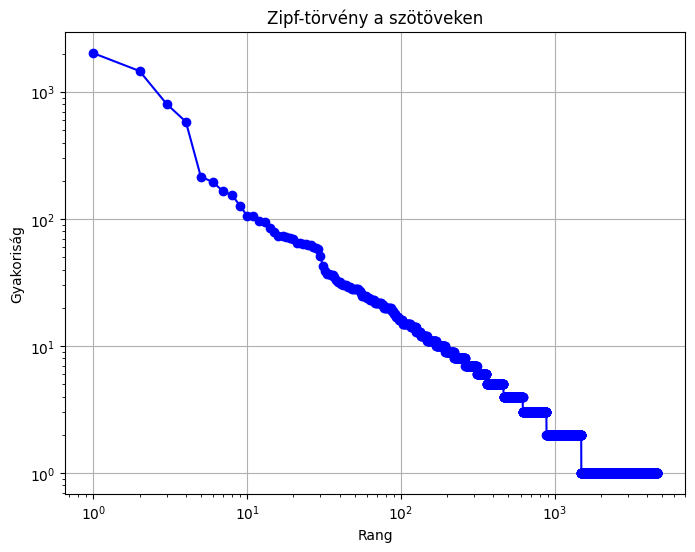

In [28]:
from collections import Counter
import matplotlib.pyplot as plt

with open('content/mnsz_minta.elemzett.txt', 'r', encoding='utf-8') as file:
  text = file.read()

szavak = [word.split('/')[1] if '|' not in word else word.split('|')[0].split('/')[1] for word in text.split()]
counts = Counter(szavak)
sorted = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
rank = range(1, len(sorted) + 1)
frequency = list(sorted.values())




plt.figure(figsize=(8, 6))
plt.plot(rank, frequency, marker='o', linestyle='-', color='b')
plt.title('Zipf-törvény a szötöveken')
plt.xlabel('Rang')
plt.ylabel('Gyakoriság')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


file.close()


6/2. A spaCy eszközzel elemezd le az eredeti mnsz_minta.sima fájlt, majd hasonlítsd össze az mnsz_minta.elemzett fájlban levő címkézett szöveggel. Készíts egy listát azokról a szavakról, amelyekhez másféle szófajt rendelt a spaCy, mint ami az elemzett fájlban volt. Vigyázz, a két program máshogy jelöli a szófajokat: N = NOUN (ez nem számít különbségnek), valamint a PUNCT lehet egyenlő az SPUNCT és a WPUNCT címkékkel is. Hagyd figyelmen kívül azokat az eseteket, amikor nem ugyanaz a két mondat hossza az elemzés után.

In [19]:
pip install https://huggingface.co/huspacy/hu_core_news_lg/resolve/main/hu_core_news_lg-any-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.4/401.4 MB 3.1 MB/s eta 0:00:00


In [26]:
import hu_core_news_lg
from spacy.tokens import Doc


pos_mapping = {
    'VERB': 'V', 'NOUN': 'N', 'PROPN': 'N', 'WPUNCT': 'PUNCT', 'SPUNCT': 'PUNCT', 'ADJ': 'A',
    'CCONJ': 'CON', 'SCONJ': 'CON', 'PRON': 'Pro', 'Con': 'CON', 'Adv': 'ADV', 'Det': 'DET'
}

with open('content/mnsz_minta.sima.txt', 'r', encoding='iso-8859-1') as file:
    original_text = file.read().encode('utf-8').decode('utf-8').replace('\n',' ')

file = open("content/mnsz_minta.elemzett.txt", "r", encoding="utf-8")
analyzed_text = file.read()

analyzed_sentences = [line.split() for line in analyzed_text.strip().split('\n') if line]

doc = nlp(original_text)
spacy_sentences = [[(token.text, pos_mapping.get(token.pos_, token.pos_)) for token in sent] for sent in doc.sents]


def compare(spacy_sentences, analyzed_text, pos_mapping):
    wait_list = []
    mismatched_words = []

    for (word1, pos1), (word2, pos2) in zip(analyzed_words, extracted_words):
        if pos1 in pos_conversion:
            pos1 = pos_conversion[pos1]
        if pos2 in pos_conversion:
            pos2 = pos_conversion[pos2]

        if pos1 != pos2:
            wait_list.append(f"{word1} [{pos1}] - {word2} [{pos2}]")
        if pos1 == "PUNCT" and pos2 == "PUNCT":
            mismatched_words.extend(wait_list)
            wait_list.clear()
        elif (pos1 == "PUNCT") ^ (pos2 == "PUNCT"):
            wait_list.clear()
    return mismatched_words

mismatched = compare(spacy_sentences, analyzed_text, pos_mapping)
for word in mismatched:
  print(word)

VIZSGÁZNI [N] - VIZSGÁZNI [V]
KELLENE [N] - KELLENE [V]
is [ADV] - is [CON]
semmit [Pro] - semmit [N]
semmit [Pro] - semmit [N]
érettségire [N] - érettségire [A]
megbukom [V] - megbukom [Pre]
valami [A] - valami [Pro]
kitömött [A] - kitömött [MIB]
földtelenül [A] - földtelenül [ADV]
lebegek [A] - lebegek [V]
visszatérõ [A] - visszatérõ [MIF]
érettségin [N] - érettségin [A]
tizenöt [NUM] - tizenöt [Num]
túl [ADP] - túl [ADV]
volt [AUX] - volt [V]
az [DET] - az [Pro]
jobbra [ADV] - jobbra [N]
át [ADV] - át [Pre]
balra [ADV] - balra [A]
át [ADV] - át [Pre]
egyszer [ADV] - egyszer [Num]
között [ADP] - között [NU]
letiport [N] - letiport [MIB]
gazban [N] - gazban [A]
elsõ [A] - elsõ [Num]
dugott [A] - dugott [MIB]
csitrik [N] - csitrik [A]
elõtte [ADP] - elõtte [NU]
pár [DET] - pár [Num]
21 [NUM] - 21 [DIG]
plusz [A] - plusz [N]
2 [NUM] - 2 [DIG]
24-gyel [N] - 24-gyel [UNKNOWNTAG]
szörnyû [N] - szörnyû [A]
se [CON] - se [ADV]
se [CON] - se [ADV]
se [CON] - se [ADV]
teljesen [A] - teljesen [